In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load data
df2 = pd.read_excel('Datasets/Nepal Master Sheet.xlsx', sheet_name='Final_compiled')
df = df2.copy()



# Define Traverse assignment function (same as before)
def assign_traverse(gns):
    if not isinstance(gns, str):  # Handle non-string values
        return None
    gns = gns.split('22')[0].split('23')[0].strip("'").strip('"')
    if gns.startswith("S1"):
        return "Traverse 1*" if gns in ["S1m", "S1i"] else "Traverse 1"
    elif gns.startswith("S2"):
        return "Traverse 2"
    elif gns.startswith("S3"):
        if gns in ["S3k", "S3m", "S3u", "S3s", "S3ag", "S3ad"]:
            return "Traverse 4"
        elif gns in ["S3y", "S3ae"]:
            return "Traverse 3*"
        return "Traverse 3"
    elif gns.startswith("S4"):
        return "Traverse 5*" if gns in ["S4m", "S4l"] else "Traverse 5"
    return None



df["Traverse"] = df["GNS"].apply(assign_traverse)
df = df[df["Traverse"] == "Traverse 3"]



# Convert Li concentrations to millimolar
df['Li_mM'] = df['Li_ppm'] / 6.94

# Convert Li concentrations to nanomolar
df['Li_nM'] = df['Li_ppm'] * 1000000 / 6.94

# Convert Li concentrations to mol/m^3 (from nM)
df['Li_mol_m3'] = df['Li_nM'] * 1e-6  # Convert nM to mol/m^3


variable = "Li_mol_m3"

df["z'"] = df[variable] - df[variable].min()) / df[variable].max() - df[variable].min()


In [4]:


# Reaction rate constant k (log10 form) and unit conversion
log_k = -11.2  # Example log10 k value
k = np.exp(log_k)  # Convert to mol/m^2/s
phi = 0.07
A_s = 1  # Assume unit specific surface area for simplicity
f = 0.5
C_zero = df[variable].min()  # Initial concentration (mol/m^3)

# 25 years in seconds
time_guess = 25 * 365 * 24 * 60 * 60


Nd = time_guess * k / (phi * C_zero)



In [7]:
# Cz' = Nd(1-f)z' + Co'

#Co' = Co = C_zero

# Simulate between z' = 0 and z' = 1 in timestep of 0.01
z_prime = np.arange(0, 1.0, 0.01)
Cz_prime = Nd * (1 - f) * z_prime + C_zero




KeyError: "z'"

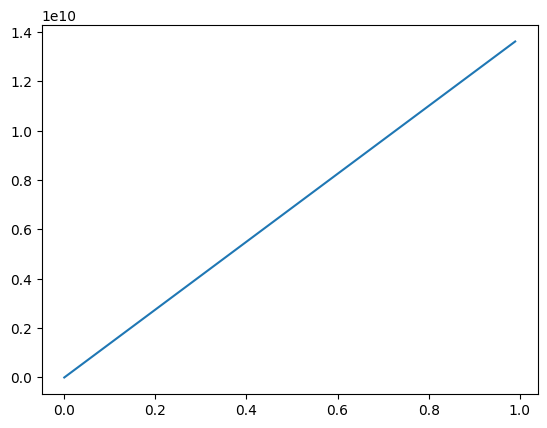

In [ ]:
# plot Conc vs z'
plt.plot(z_prime, Cz_prime)
plt.xlabel("z")
plt.ylabel("Concentration (mol/m^3)")
plt.title("Concentration vs z'")
plt.show()